In [1]:
# EXECUTE THIS BLOCK FIRST FOR INITIALISATION!

# dependencies
# ==========
# jupyter_server_mathjax
# ipywidget
# ipysheet
# matplotlib

from ipywidgets import interactive,widgets
from IPython.display import display,Math,HTML
from matplotlib import pyplot
import ipysheet
from ipysheet import calculation
import math
import decimal
import pandas

# Definitionen

## Begriffe

False-Non-Match: 2 Samples der gleichen Person werden nicht erkannt

False-Match: 2 Samples unterschiedlicher Personen werden als eine Person erkannt

Match-Score: Schwellwert zur Erkennung eines biometrischen Merkmals. Ist der Berechnete Wert größer als der Schwellenwert wird das Sample akzeptiert.

Verifikation: 1:1 Vergleich mit 1 Referenz (Bist du wirklich der richtige?)

Identifikation: 1:N Vergleich mit N Referenzen (Bist du schon im System?)

## Kennzahlen
False-Match-Rate (FMR): Anteil fälschlicherweise erkannter Personen/biometrischer Merkmale (Falschübereinstimmung)

False-Non-Match-Rate (FNMR): Anteil fälschlicherweise nicht erkannter Personen/biometrisches Merkmale (Falschzurückweisung)

Equal-Error-Rate: optimaler Schwellwert zwischen FAR/FRR

ZeroFAR: alle Unbereechtigten werden abgewiesen

ZeroFRR: alle möglichen Kanidaten werden akzeptiert

## Anforderungen
- inhaltlich
    - Universalität
    - Einzigartigkeit / Einmaligkeit
    - Konstanz
    - Erfassbarkeit / Messbarkeit
- technisch
    - Performanz
    - Akzeptanz
    - Anwenderfreundlichkeit
    - Fälschungssicher und Überwindungsresistenz

# Genuine Vergleiche

## Formel

$N$: Anzahl der Personen

$t$: Anzahl der Samples des gleichen biometrischen Merkmals

$N\cdot\frac{t\cdot(t-1)}{2}$

In [2]:
def r(n,t):
    genuine = n*(t*(t-1))/2
    display(Math(str(n)+'\cdot \\frac{'+str(t) +'\cdot('+str(t) +'-1)}{2}=' + str(genuine)))
    return genuine

w = interactive(r, n=widgets.IntText(value=4, description="N:"),t=widgets.IntText(value=5, description="t:"))
display(w)

interactive(children=(IntText(value=4, description='N:'), IntText(value=5, description='t:'), Output()), _dom_…

# Imposter Vergleiche

## Formel

$N$: Anzahl der Personen

$t$: Anzahl der Samples des gleichen biometrischen Merkmals

$\frac{N\cdot(N-1)}{2}\cdot t^2$

In [3]:
def r(n,t):
    imposter = ((n*(n-1))/2)*t**2
    display(Math('\\frac{'+str(n) + '\cdot(' + str(n) + '-1)}{2}\cdot '+str(t)+'^2 =' +str(imposter)))
    return imposter

w = interactive(r, n=widgets.IntText(value=4),t=widgets.IntText(value=5))
display(w)

interactive(children=(IntText(value=4, description='n'), IntText(value=5, description='t'), Output()), _dom_cl…

# FPIR (FMR$_N$)

## Formel

Ein False Positive Identification liegt vor, wenn eine Identitaet aus der Referenzdatenbank zurueckgegeben wird obwohl der Nutzer nicht ins System enrollt wurde.

$FPIR=1-(1-FMR_1)^N$

$(1-FMR)$: Wahrscheinlichkeit, dass kein Single False Match auftritt

$(1-FMR)^N$: Wahrscheinlichkeit, dass kein einziger False Match ueber alle N Sample auftritt

In [4]:
def f(fmr,n):
    fpir = 1-(1-fmr)**n
    display(Math('FPIR=1-(1-' + format(fmr, '.20f').rstrip('0') + ')^{' + str(n) + '}=' + str(fpir)))
    return fpir

w=interactive(f, fmr=widgets.FloatText(value=0.00001),n=widgets.IntText(value=100))
display(w)

interactive(children=(FloatText(value=1e-05, description='fmr'), IntText(value=100, description='n'), Output()…

## Fehlerratenberechung mit einer Datenbank
Das System prüft beispielsweise Zutritte an Hand von N Smaples in einer Datenbank.

In [5]:
def rounded(reisende, fpir, nachkommastellen):
    exact = reisende*fpir
    rounded = round(exact, nachkommastellen)
    diff = abs(exact-rounded)
    display(Math(str(reisende)+"\cdot" + str(fpir) + " = " + str(exact) + " \\approx " + str(rounded)))
    display("differenz: " + str(diff))

r=interactive(rounded, reisende=widgets.IntText(value=100),fpir=widgets.FloatText(value=0.09516303438524065),nachkommastellen=widgets.IntSlider(value=1))
display(r)

interactive(children=(IntText(value=100, description='reisende'), FloatText(value=0.09516303438524065, descrip…

# DET-Kurven

## Formel

$L=L_1+L_0$: Anzahl der einzelnen Match-Scores $s_i$

$L_1$: Anzahl der Samples des gleichen biometrischen Merkmals

$L_0$: Anzahl der Samples des gleichen biometrischen Merkmals

$FAR(\eta_j) = \frac{1}{L_0} \sum^L_{i=L_1+1} I(s_i >= \eta_j)$

$FRR(\eta_j) = \frac{1}{L_1} \sum^{L_1}_{i=1} I(s_i < \eta_j)$

$I(x) = x ? 1 : 0$

'Genuine Count = 23'

'Imposter Count = 21'

'Total Count = 44'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

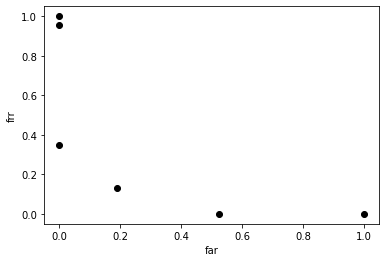

In [6]:
schwellenwerte = [0.5,0.6,0.7,0.8,0.9,1.0]


genuine_scores = [
    0.84,
    0.88,
    0.88,
    0.8,
    0.86,
    0.88,
    0.83,
    0.77,
    0.8,
    0.83,
    0.71,
    0.85,
    0.88,
    0.87,
    0.78,
    0.75,
    0.9,
    0.85,
    0.87,
    0.75,
    0.67,
    0.69,
    0.68
]
imposter_scores = [
    0.64,
    0.57,
    0.5,
    0.66,
    0.58,
    0.5,
    0.51,
    0.65,
    0.57,
    0.57,
    0.54,
    0.69,
    0.68,
    0.57,
    0.56,
    0.62,
    0.68,
    0.75,
    0.73,
    0.73,
    0.73
]

display("Genuine Count = " + str(len(genuine_scores)))
display("Imposter Count = " + str(len(imposter_scores)))
display("Total Count = " + str(len(genuine_scores)+len(imposter_scores)))

for nj in schwellenwerte:
    # FAR
    farCount = 0
    for i in imposter_scores:
        if i >= nj:
            farCount = farCount + 1
    far = farCount/len(imposter_scores)
    display(Math('FAR('+str(nj)+')=\\frac{1}{'+str(len(imposter_scores))+'}\cdot ' + str(farCount) + '='+str(far)))
    
    # FRR
    frrCount = 0
    for i in genuine_scores:
        if i < nj:
            frrCount = frrCount + 1
    frr = frrCount/len(genuine_scores)
    display(Math('FRR('+str(nj)+')=\\frac{1}{'+str(len(genuine_scores))+'}\cdot ' + str(frrCount) + '='+str(frr)))
    
    pyplot.plot(far,frr,'ok-')

pyplot.xlabel("far")
pyplot.ylabel("frr")
pyplot.show()

# Hamming Distanz / Iriserkennung

## Formel

$HD = \frac{||(C_A \oplus C_B) \land M_A \land M_B||}{||M_A \land M_B||}$

In [19]:
sheet = ipysheet.sheet(rows=16, columns=7, column_headers=["Code A","Code B", "Code A ⊻ Code B", "Mask A", "Mask B", "Mask A ∧ Mask B", "(Code A ⊻ Code B) ∧ (Mask A ∧ Mask B)"])

codea = ipysheet.column(0,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
codeb = ipysheet.column(1,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
col3 = ipysheet.column(2,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],read_only=True)
maska = ipysheet.column(3,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
maskb = ipysheet.column(4,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
col6 = ipysheet.column(5,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],read_only=True)
col7 = ipysheet.column(6,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],read_only=True)

@calculation(inputs=[codea, codeb], output=col3)
def axorb(a,b):
    out =[]
    for i in range(len(a)):
        out.append(a[i]^b[i])
    return out

@calculation(inputs=[maska, maskb], output=col6)
def aandb(a,b):
    out =[]
    for i in range(len(a)):
        out.append(a[i]&b[i])
    return out

@calculation(inputs=[col3, col6], output=col7)
def hdt(a,b):
    out =[]
    for i in range(len(a)):
        out.append(a[i]&b[i])
    return out

display(sheet)

Sheet(cells=(Cell(column_end=0, column_start=0, row_end=15, row_start=0, squeeze_row=False, type='numeric', va…

# Multibiometrische Systeme

Zur Identifikation einer Person werden unterschiedliche Merkmale kombiniert. Ein Schwellwert entscheidet über Annahme oder Abweisung.

## Decision Level Fusion

Unterschiedliche Merkmale werden geprüft. Jede Komponente gibt 1 oder 0 zurück. Anschließend Mehrheitsentscheid im System über 0 und 1.

In [8]:
matcher_scores = [0.9,0.7,0.68,0.5]

sample_matrix = [
    [1,0,0,0],
    [0,0,1,0],
    [1,1,1,0],
    [1,0,1,0],
    [1,0,0,1]]

########################################
verification_count = len(sample_matrix)
values0 = [0]*verification_count
values1 = [0]*verification_count
erg = [0]*verification_count
sum0 = 0
sum1 = 0

first_row = [""]
for i in matcher_scores:
    first_row.append(i)
for i in range(3):
    first_row.append("")
table = [first_row]

for i in range(verification_count):
    row = ["V" + str(i)];
    for j in range(len(sample_matrix[i])):
        if sample_matrix[i][j] == 0:
            values0[i] = values0[i] + matcher_scores[j]
        else:
            values1[i] = values1[i] + matcher_scores[j]
        row.append(sample_matrix[i][j])
    if values0[i]>values1[i]:
        erg[i] = 0
        sum0 = sum0 +1
    else:
        erg[i] = 1
        sum1 = sum1 +1   
    row.append(values0[i])
    row.append(values1[i])
    row.append(erg[i])
    table.append(row)

d = pandas.DataFrame.from_dict(table)
display(d)

if sum0 > sum1:
    display("Das System lehnt ab. Ergebnis: 0")
else:
    display("Das System akzeptiert das Sample. Ergebnis: 1")

,0,1,2,3,4,5,6,7
0,,0.9,0.7,0.68,0.5,,,
1,V0,1.0,0.0,0.00,0.0,1.88,0.9,0
2,V1,0.0,0.0,1.00,0.0,2.1,0.68,0
3,V2,1.0,1.0,1.00,0.0,0.5,2.28,1
4,V3,1.0,0.0,1.00,0.0,1.2,1.58,1
5,V4,1.0,0.0,0.00,1.0,1.38,1.4,1


'Das System akzeptiert das Sample. Ergebnis: 1'

# Experimentelles

Sheet(cells=(Cell(column_end=0, column_start=0, row_end=5, row_start=0, squeeze_row=False, type='numeric', val…

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Sheet(cells=(Cell(column_end=0, column_start=0, row_end=0, row_start=0, type='numeric', value=1.0), Cell(colum…

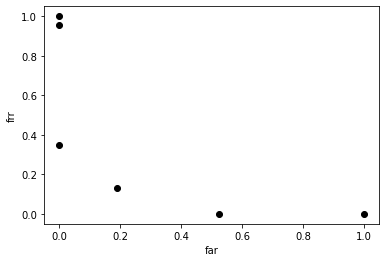

In [9]:
inputsheet = ipysheet.sheet(rows=40, columns=3, column_headers=["Schwellenwerte","Genuine Scores", "Imposter Scores"])
schwellenwerte = ipysheet.column(0, [0.5,0.6,0.7,0.8,0.9,1.0])
genuine=ipysheet.column(1, [0.84,0.88,0.88,0.8,0.86,0.88,0.83,0.77,0.8,0.83,0.71,0.85,0.88,0.87,0.78,0.75,0.9,0.85,0.87,0.75,0.67,0.69,0.68])
imposter=ipysheet.column(2, [0.64,0.57,0.5,0.66,0.58,0.5,0.51,0.65,0.57,0.57,0.54,0.69,0.68,0.57,0.56,0.62,0.68,0.75,0.73,0.73,0.73])

dummy = ipysheet.cell(40,0)

display(inputsheet)

outputsheet = ipysheet.sheet(len(schwellenwerte.value)+1, columns=2, column_headers=["far","frr"], row_headers=[str(a) for a in schwellenwerte.value])

@calculation(inputs=[schwellenwerte,genuine,imposter],output=dummy)
def calculate(schwellenwerte,genuine,imposter):
    genuineCount = len(genuine)
    imposterCount = len(imposter)
    nr = 0
    for nj in schwellenwerte:
        # FAR
        farCount = 0
        for i in imposter:
            if i >= nj:
                farCount = farCount + 1
        far = farCount/imposterCount
        ipysheet.cell(nr,0, far)
        display(Math('FAR('+str(nj)+')=\\frac{1}{'+str(imposterCount)+'}\cdot ' + str(farCount) + '='+str(far)))

        # FRR
        frrCount = 0
        for i in genuine:
            if i < nj:
                frrCount = frrCount + 1
        frr = frrCount/genuineCount
        ipysheet.cell(nr,1, frr)
        
        nr+=1
        display(Math('FRR('+str(nj)+')=\\frac{1}{'+str(genuineCount)+'}\cdot ' + str(frrCount) + '='+str(frr)))
        pyplot.plot(far,frr,'ok-')
    display(outputsheet)
    pyplot.xlabel("far")
    pyplot.ylabel("frr")
    pyplot.show()



